In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
di_df = pd.read_csv('disability.csv',skiprows = 1)

In [12]:
di_df.head()

,Table Name,State Code,Distt.Code,Area Name,Total/Rural/Urban,Age-group,Total number of disabled persons,Unnamed: 7,Unnamed: 8,In seeing,...,Unnamed: 23,Mental Illness,Unnamed: 25,Unnamed: 26,Any Other,Unnamed: 28,Unnamed: 29,Multiple Disability,Unnamed: 31,Unnamed: 32
0,NaN,NaN,NaN,NaN,NaN,NaN,Persons,Males,Females,Persons,...,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
1,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,4,...,18,19,20,21,22,23,24,25,26,27
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C4920,20.0,0.0,State-JHARKHAND,Total,Total,"769,980","426,876","343,104","180,721",...,"15,857","20,157","11,718","8,439","112,372","62,136","50,236","58,835","31,965","26,870"
4,C4920,20.0,0.0,State-JHARKHAND,Total,0-4,"46,455","24,406","22,049","14,154",...,723,292,173,119,"10,382","5,417","4,965","2,773","1,551","1,222"


In [14]:
di_df.columns

Index(['Table Name', 'State Code', 'Distt.Code', 'Area Name',
       'Total/Rural/Urban', 'Age-group', 'Total number of disabled persons',
       'Unnamed: 7', 'Unnamed: 8', 'In seeing', 'Unnamed: 10', 'Unnamed: 11',
       'In Hearing', 'Unnamed: 13', 'Unnamed: 14', 'In Speech', 'Unnamed: 16',
       'Unnamed: 17', 'In Movement', 'Unnamed: 19', 'Unnamed: 20',
       'Mental Retardation', 'Unnamed: 22', 'Unnamed: 23', 'Mental Illness',
       'Unnamed: 25', 'Unnamed: 26', 'Any Other', 'Unnamed: 28', 'Unnamed: 29',
       'Multiple Disability', 'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')

In [16]:
adi_df = di_df[['Area Name','Age-group']]
tot_di_df = di_df.loc[:,'Total number of disabled persons':'In seeing'].iloc[:,:-1]
mental_di_df = di_df.loc[:,'Mental Retardation':'Mental Illness'].iloc[:,:-1]
mental1_di_df = di_df.loc[:,'Mental Illness':'Any Other'].iloc[:,:-1]
mental1_di_df.head()

,Mental Illness,Unnamed: 25,Unnamed: 26
0,Persons,Males,Females
1,19,20,21
2,NaN,NaN,NaN
3,"20,157","11,718","8,439"
4,292,173,119


In [18]:
total_dis_df = pd.concat([adi_df,tot_di_df],axis = 1)
mental_ill_df = pd.concat([adi_df,mental_di_df,mental1_di_df],axis = 1)
total_dis_df.head()

,Area Name,Age-group,Total number of disabled persons,Unnamed: 7,Unnamed: 8
0,NaN,NaN,Persons,Males,Females
1,NaN,NaN,1,2,3
2,NaN,NaN,NaN,NaN,NaN
3,State-JHARKHAND,Total,"769,980","426,876","343,104"
4,State-JHARKHAND,0-4,"46,455","24,406","22,049"


In [20]:
mental_ill_df.head()

,Area Name,Age-group,Mental Retardation,Unnamed: 22,Unnamed: 23,Mental Illness,Unnamed: 25,Unnamed: 26
0,NaN,NaN,Persons,Males,Females,Persons,Males,Females
1,NaN,NaN,16,17,18,19,20,21
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State-JHARKHAND,Total,"37,458","21,601","15,857","20,157","11,718","8,439"
4,State-JHARKHAND,0-4,"1,545",822,723,292,173,119


In [22]:
mental_ill_df.columns = ['Area Name','Age group','Mental-Retardation-total','Mental-Retardation-M','Mental-Retardation-F','Mental-Illness-total','Mental-Illness-M','Mental-Illness-F']
mental_ill_df.head()

,Area Name,Age group,Mental-Retardation-total,Mental-Retardation-M,Mental-Retardation-F,Mental-Illness-total,Mental-Illness-M,Mental-Illness-F
0,NaN,NaN,Persons,Males,Females,Persons,Males,Females
1,NaN,NaN,16,17,18,19,20,21
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State-JHARKHAND,Total,"37,458","21,601","15,857","20,157","11,718","8,439"
4,State-JHARKHAND,0-4,"1,545",822,723,292,173,119


In [24]:
mental_ill_df = mental_ill_df[3:].reset_index(drop = True)

# EDA

In [26]:
mental_ill_df.head()

,Area Name,Age group,Mental-Retardation-total,Mental-Retardation-M,Mental-Retardation-F,Mental-Illness-total,Mental-Illness-M,Mental-Illness-F
0,State-JHARKHAND,Total,"37,458","21,601","15,857","20,157","11,718","8,439"
1,State-JHARKHAND,0-4,"1,545",822,723,292,173,119
2,State-JHARKHAND,5-9,"3,631","2,034","1,597",984,568,416
3,State-JHARKHAND,10-19,"10,276","5,819","4,457","3,612","2,060","1,552"
4,State-JHARKHAND,20-29,"7,196","4,195","3,001","4,151","2,501","1,650"


In [29]:
mental_ill_df.info

<bound method DataFrame.info of                         Area Name       Age group Mental-Retardation-total  \
0                 State-JHARKHAND           Total                   37,458   
1                 State-JHARKHAND             0-4                    1,545   
2                 State-JHARKHAND             5-9                    3,631   
3                 State-JHARKHAND           10-19                   10,276   
4                 State-JHARKHAND           20-29                    7,196   
..                            ...             ...                      ...   
970  District-Saraikela-Kharsawan           60-69                        4   
971  District-Saraikela-Kharsawan           70-79                        4   
972  District-Saraikela-Kharsawan           80-89                        0   
973  District-Saraikela-Kharsawan             90+                        1   
974  District-Saraikela-Kharsawan  Age Not Stated                        0   

    Mental-Retardation-M Mental

In [31]:
mental_ill_df.describe

<bound method NDFrame.describe of                         Area Name       Age group Mental-Retardation-total  \
0                 State-JHARKHAND           Total                   37,458   
1                 State-JHARKHAND             0-4                    1,545   
2                 State-JHARKHAND             5-9                    3,631   
3                 State-JHARKHAND           10-19                   10,276   
4                 State-JHARKHAND           20-29                    7,196   
..                            ...             ...                      ...   
970  District-Saraikela-Kharsawan           60-69                        4   
971  District-Saraikela-Kharsawan           70-79                        4   
972  District-Saraikela-Kharsawan           80-89                        0   
973  District-Saraikela-Kharsawan             90+                        1   
974  District-Saraikela-Kharsawan  Age Not Stated                        0   

    Mental-Retardation-M Ment

<Axes: >

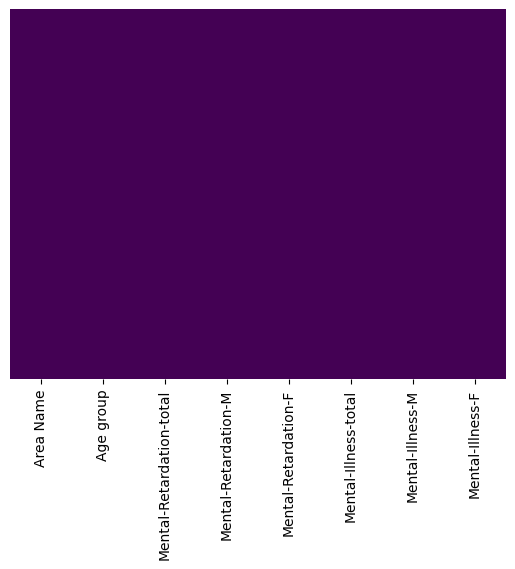

In [33]:
sns.heatmap(mental_ill_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')